## Умова лабораторної роботи

### Модель класифікації

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи  `sklearn.tree.DecisionTreeClassifier`з рiзними значеннями гiперпараметрiв.

### Початкові дані


(a) dataset_Malicious_and_Benign_Websites.csv</br> 
(b)
```python
import numpy as np
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.xor(X[:, 0] > 0, X[:, 1] > 0)
```

### Завдання

1. Представити початковi данi графiчно.
2. Розбити данi на навчальний та валiдацiйний набори.
3. Побудувати на навчальному наборі даних моделі класифікації.
4. Представити моделі графічно.
5. Виконати прогнози на основі побудованих моделей.
6. Для кожної з моделей оцінити, чи має місце перенавчання.
7. Побудувати границі рішень графічно для кожної з моделей.
8. Розрахувати для кожної моделі значення наступних критеріїв якості:
    * матрицю неточностей (confusion matrix),
    * точність (precision),
    * повноту (recall),
    * міру F1 (F1 score),
    * побудувати криву точності-повноти (precision-recall(PR) curve), ROC-криву, показник AUC.
9. Спробувати виконати решітчастий пошук (grid search) для підбору гіпeрпараметрів моделей.
10. Зробити висновки про якiсть роботи моделей на дослiджених даних. На основi критерiїв якостi спробувати обрати найкращу модель.
11. Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.


## Метрики якості

$TP$: Кількість справжніх позитивних прикладів.</br>
$FN$: Кількість помилкових негативних прикладів.</br>
$FP$: Кількість помилкових позитивних прикладів.</br>
$TN$: Кількість справжніх негативних прикладів.</br>

**True Positive Rate** - $TPR = \frac{TP}{TP + FN}$.</br>
**False Positive Rate** - $FPR = \frac{FP}{FP + TN}$.</br>
**Precision (Точність)** - $Precision = \frac{TP}{TP + FP}$</br>
**Recall (Повнота)** - $Recall = \frac{TP}{TP + FN}$.</br>
**ROC (Receiver Operating Characteristic) крива** - будується на основі TPR та FPR для різних порогів класифікації. Лінія починається у точці (0,0) та закінчується у точці (1,1).</br>
**AUC (Area Under the Curve)** - площа під ROC кривою. Вимірює здатність моделі до класифікації, де $0.5$ — випадкова класифікація, $1.0$ - ідеальна класифікація.</br>
**F1-Score** - це середнє гармонічне точності та повноти. $F_1 = \frac{\beta \cdot Precision \cdot Recall}{Precision + Recall}$.</br>
**Precision-Recall крива** показує компроміс між точністю та повнотою для різних порогових значень. Лінія починається у точці (0,1) та закінчується у точці (1,0)

## `DecisionTreeClassifier`

Дерева рішень (Decision Trees, DTs) — це непараметричний метод навчання з учителем для класифікації та регресії. 

Мета DTs: створити модель для прогнозів значень цільової змінної, навчаючись простим правилам прийняття рішень, виведеним із характеристик даних. Дерево можна розглядати як кусково-константну апроксимацію.

Переваги дерев рішень:  

- Простота у розумінні та відтворенні. Дерева можна візуалізувати за допомогою функції `sklearn.tree.plot_tree`.  
- Потребує лише числові значення та без пропусків.  
- Низька вартість використання дерева (тобто прогнозування даних) - логарифмічна від кількості точок даних, використаних для навчання дерева.  
- Можливість вирішення багатовихідних задач.  
- Модель "білого ящика". Якщо певна ситуація спостерігається в моделі, пояснення умов легко дається за допомогою булевої логіки.
- Можливість перевірки моделі за допомогою статистичних тестів. Це дозволяє оцінити надійність моделі.  
- Висока продуктивність, навіть якщо припущення моделі частково порушуються даними.

Недоліки дерев рішень:  

- Навчальні алгоритми дерев рішень можуть створювати надмірно складні дерева, які погано узагальнюють дані. Це називається перенавчанням. Для уникнення цієї проблеми потрібні механізми, такі як обрізання дерева, встановлення мінімальної кількості зразків на листовому вузлі `min_samples_leaf` або обмеження максимальної глибини дерева `max_depth`.    
- Існують концепції, які важко навчити, оскільки дерева рішень не можуть легко їх виразити, наприклад, **проблеми XOR**, парності чи мультиплексора.  
- Навчальні алгоритми дерев рішень створюють зміщені дерева, якщо деякі класи домінують. Тому рекомендується **збалансувати набір даних** перед навчанням дерева рішень.  

##  Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_fscore_support,
    PrecisionRecallDisplay,
    RocCurveDisplay,
)
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Websites

### EDA

Опис фіч:
* `URL` - aнонімний ідентифікатор URL.
* `URL_LENGTH` - кількість символів в URL.
* `NUMBER_SPECIAL_CHARACTERS` - кількість спеціальних символів, ідентифікованих в URL (/, %, #, &, ., =).
* `CHARSET` - стандарт кодування символів.
* `SERVER` - операційна система сервера, що обслуговує URL.
* `CONTENT_LENGTH` - розмір вмісту заголовка HTTP.
* `WHOIS_COUNTRY` - країна реєстрації URL, згідно з даними WHOIS.
* `WHOIS_STATEPRO` - регіон реєстрації URL, згідно з даними WHOIS.
* `WHOIS_REGDATE` - дата реєстрації URL, згідно з даними WHOIS.
* `WHOIS_UPDATED_DATE` - дата останнього оновленння URL, згідно з даними WHOIS.
* `TCP_CONVERSATION_EXCHANGE` - кількість TCP-пакетів, якими обмінюються сервер і honeypot.
* `DIST_REMOTE_TCP_PORT` - кількість портів які відрізняються від TCP-портів.
* `REMOTE_IPS` - загальна кількість IP-адрес, підключених до honeypot.
* `APP_BYTES` - кількість переданих байтів між honeypot і сервером.
* `SOURCE_APP_PACKETS` - кількість пакетів, надісланих з honeypot на сервер.
* `REMOTE_APP_PACKETS` - кількість пакетів, отриманих від сервера до honeypot.
* `APP_PACKETS` - загальна кількість IP-пакетів, згенерованих під час зв’язку між honeypot і сервером.
* `DNS_QUERY_TIMES` - кількість DNS-пакетів, згенерованих під час зв’язку між honeypot і сервером.

Цільова змінна:
* `TYPE` - тип веб-сторінки (1 - шкідлива, 0 - безпечна).

In [2]:
train_path = "data/dataset_Malicious_and_Benign_Websites.csv"
websites = pd.read_csv(train_path)

In [3]:
websites.Type.value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [4]:
websites_info = pd.DataFrame({
    'type': websites.dtypes,
    "nunique": websites.nunique(),
    "nan": websites.isna().sum(),
})

websites_info

,type,nunique,nan
URL,object,1781,0
URL_LENGTH,int64,142,0
NUMBER_SPECIAL_CHARACTERS,int64,31,0
CHARSET,object,8,7
SERVER,object,238,176
CONTENT_LENGTH,float64,637,812
WHOIS_COUNTRY,object,48,306
WHOIS_STATEPRO,object,181,362
WHOIS_REGDATE,object,890,127
WHOIS_UPDATED_DATE,object,593,139


In [5]:
websites.head().T

,0,1,2,3,4
URL,M0_109,B0_2314,B0_911,B0_113,B0_403
URL_LENGTH,16,16,16,17,17
NUMBER_SPECIAL_CHARACTERS,7,6,6,6,6
CHARSET,iso-8859-1,UTF-8,us-ascii,ISO-8859-1,UTF-8
SERVER,nginx,Apache/2.4.10,Microsoft-HTTPAPI/2.0,nginx,NaN
CONTENT_LENGTH,263.0,15087.0,324.0,162.0,124140.0
WHOIS_COUNTRY,NaN,NaN,NaN,US,US
WHOIS_STATEPRO,NaN,NaN,NaN,AK,TX
WHOIS_REGDATE,10/10/2015 18:21,NaN,NaN,7/10/1997 4:00,12/05/1996 0:00
WHOIS_UPDATED_DATE,NaN,NaN,NaN,12/09/2013 0:45,11/04/2017 0:00


In [6]:
websites["WHOIS_REGDATE"] = pd.to_datetime(websites["WHOIS_REGDATE"],format="mixed", dayfirst=True,errors='coerce',utc=True)
websites["WHOIS_UPDATED_DATE"] = pd.to_datetime(websites["WHOIS_UPDATED_DATE"],format="mixed", dayfirst=True,errors='coerce',utc=True)
websites["WHOIS_UPDATED_DATE - WHOIS_REGDATE"] = (websites["WHOIS_UPDATED_DATE"] - websites["WHOIS_REGDATE"]).dt.total_seconds() / 3600

websites["NUMBER_SPECIAL_CHARACTERS / URL_LENGTH"] = websites["NUMBER_SPECIAL_CHARACTERS"] / (websites["URL_LENGTH"] + 1)
websites["REMOTE_APP_PACKETS / SOURCE_APP_PACKETS"] = websites["REMOTE_APP_PACKETS"] / (websites["SOURCE_APP_PACKETS"] + 1)
websites["REMOTE_IPS / DIST_REMOTE_TCP_PORT"] = websites["REMOTE_IPS"] / (websites["DIST_REMOTE_TCP_PORT"] + 1)

In [7]:
websites.drop(
    columns=[
        "URL_LENGTH",
        "URL",
        "WHOIS_REGDATE",
        "WHOIS_UPDATED_DATE",
        "WHOIS_STATEPRO",
        "WHOIS_COUNTRY",
        "SERVER",
        "CHARSET"
    ],
    inplace=True
)

In [8]:
websites = websites.fillna(websites.median()[0])

C:\Users\Asus\AppData\Local\Temp\ipykernel_7640\2751568286.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  websites = websites.fillna(websites.median()[0])


In [9]:
websites[websites.drop(columns="Type").duplicated()].Type.value_counts()

Type
1    25
0    22
Name: count, dtype: int64

In [10]:
websites.drop_duplicates(inplace=True)

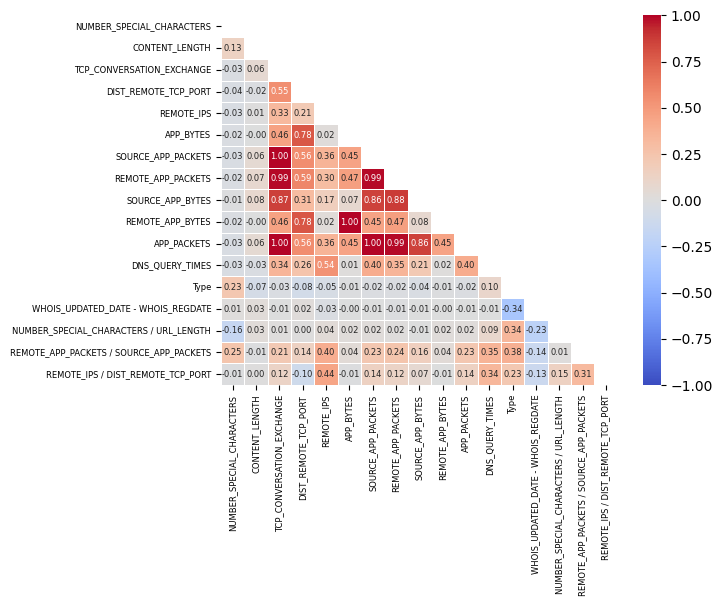

In [11]:
# plt.figure(figsize=(16, 8)) 
mask = np.triu(np.ones_like( websites.corr(), dtype=bool))
_ = sns.heatmap(
    websites.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5,
    annot_kws={"size": 6},
    mask=mask,
    vmin=-1, vmax=1
)

_ = plt.xticks(fontsize=6)  # Поворот підписів X для кращого вигляду
_ = plt.yticks(fontsize=6)

In [12]:
websites = websites[[
    'DNS_QUERY_TIMES', 
    'WHOIS_UPDATED_DATE - WHOIS_REGDATE',
    'NUMBER_SPECIAL_CHARACTERS / URL_LENGTH',
    'REMOTE_APP_PACKETS / SOURCE_APP_PACKETS',
    'REMOTE_IPS / DIST_REMOTE_TCP_PORT',
    'Type'
]]

### Split Data

In [13]:
websites_train, websites_test = train_test_split(
    websites,
    test_size=0.4,
    stratify=websites["Type"].values,
    random_state=42
)

In [14]:
websites_train.to_csv("data/websites_train.csv",index=False)
websites_test.to_csv("data/websites_test.csv",index=False)

### Finetuning

In [15]:
grid_search_1 = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["log_loss"],
        "max_depth": [3, 5],  
        "min_samples_split": [2, 5], 
        "min_samples_leaf": [1, 3, 5],
        "max_features": ["sqrt", None],
        "max_leaf_nodes": [None, 10, 20],
    },
    scoring="f1_macro",
    cv=3,
    verbose=1,
    error_score='raise'
)

In [16]:
%%time
_ = grid_search_1.fit(
    websites_train.drop(columns=["Type"]),
    websites_train["Type"]
)
print(f"best parameters: {grid_search_1.best_params_}")
print(f"f1 macro: {grid_search_1.best_score_:.4f}",)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
best parameters: {'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 3, 'min_samples_split': 5}
f1 macro: 0.8423
CPU times: total: 3.06 s
Wall time: 3.91 s


### Evaluation

Precision macro: 0.8705
Recall macro: 0.8489
F1 macro: 0.8592
Confusion matrix:
[[602  16]
 [ 21  55]]


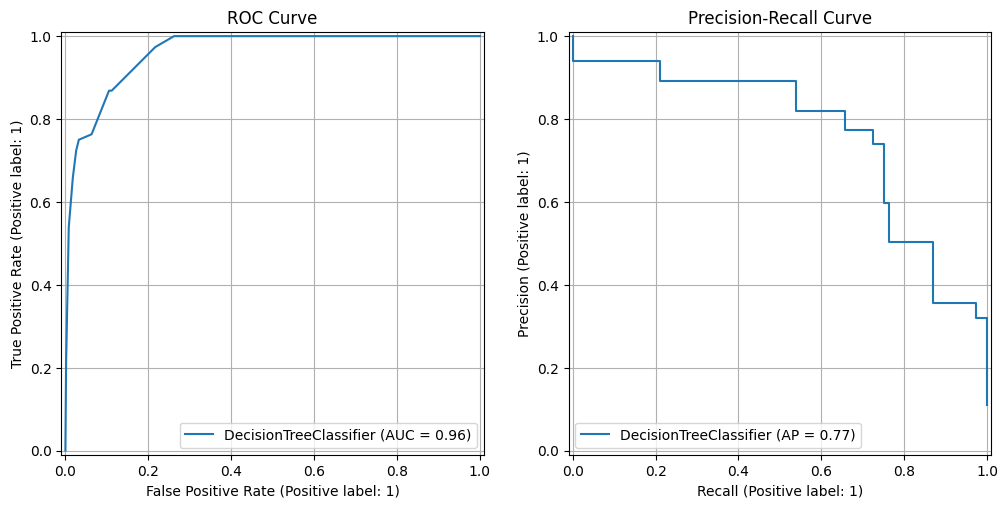

In [17]:
y_test_websites_pred = grid_search_1.best_estimator_.predict(websites_test.drop(columns=["Type"]))

precision, recall, f1, _ = precision_recall_fscore_support(
    websites_test["Type"],
    y_test_websites_pred,
    average="macro"
)

print(f"Precision macro: {precision:.4f}")
print(f"Recall macro: {recall:.4f}")
print(f"F1 macro: {f1:.4f}")
print(f"Confusion matrix:\n{confusion_matrix(websites_test["Type"],y_test_websites_pred)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(
    grid_search_1.best_estimator_,
    websites_test.drop(columns=["Type"]),
    websites_test["Type"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)


PrecisionRecallDisplay.from_estimator(
    grid_search_1.best_estimator_,
    websites_test.drop(columns=["Type"]),
    websites_test["Type"],
    ax=axes[1],
)

axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)

### Візуалізація `grid_search_1.best_estimator_`

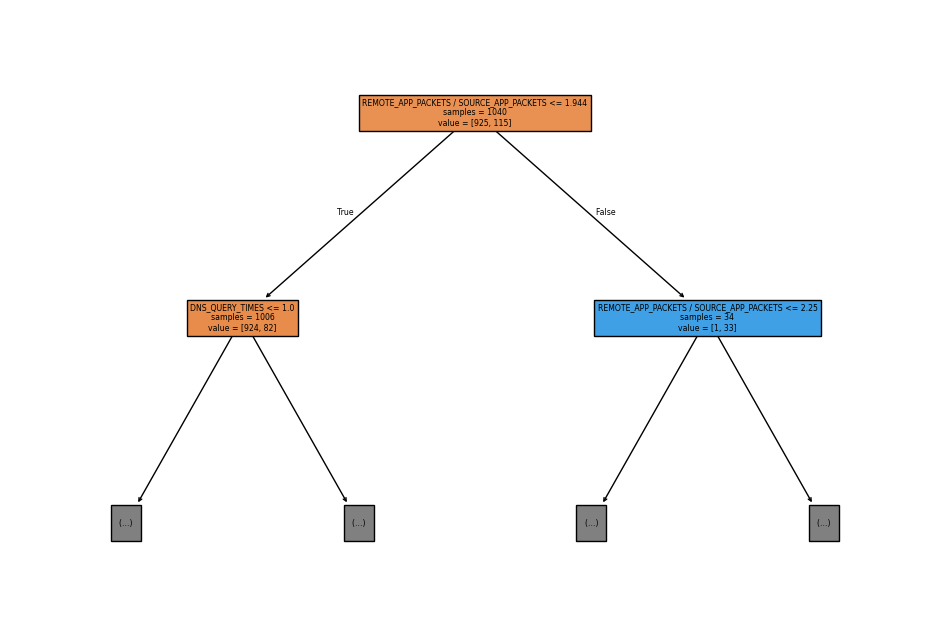

In [18]:
plt.figure(figsize=(12, 8))

_ = plot_tree(
    grid_search_1.best_estimator_,
    feature_names=websites.columns,
    filled=True,
    impurity=False,
    max_depth=1
)

## XOR

###  EDA

In [19]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

xor = pd.DataFrame({
    "X1": X[:,0],
    "X2": X[:,1],
    "Y": Y
})

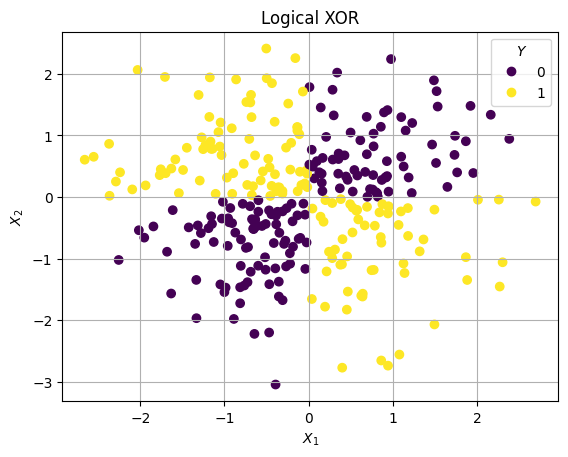

In [20]:
scatter = plt.scatter(xor["X1"],xor["X2"], c=xor["Y"], cmap='viridis')
plt.title("Logical XOR")
plt.legend(*scatter.legend_elements(), title="$Y$")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

In [21]:
xor["Y"].value_counts()

Y
0    158
1    142
Name: count, dtype: int64

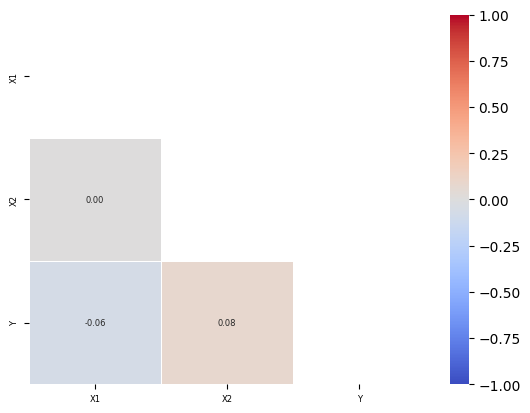

In [22]:
# plt.figure(figsize=(16, 8)) 
mask = np.triu(np.ones_like( xor.corr(), dtype=bool))
_ = sns.heatmap(
    xor.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5,
    annot_kws={"size": 6},
    mask=mask,
    vmin=-1, vmax=1
)

_ = plt.xticks(fontsize=6)
_ = plt.yticks(fontsize=6)

### Split Data

In [23]:
xor_train, xor_test= train_test_split(
    xor,
    test_size=0.4,
    random_state=42,
    stratify=xor["Y"].values
)

Збережемо підвибірки для lab3.

In [24]:
xor_train.to_csv("data/xor_train.csv",index=False)
xor_test.to_csv("data/xor_test.csv",index=False)

### Finetuning

In [ ]:
grid_search_2 = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": [2,3],
        "min_samples_split": [5,10],
        "min_samples_leaf": [1,2],
        "max_leaf_nodes": [5,7],
    },
    scoring="f1",
    return_train_score=True,
    cv=3,
    verbose=1,
    error_score='raise'
)

In [26]:
%%time
_ = grid_search_2.fit(
    xor_train[["X1", "X2"]],
    xor_train["Y"]
)

print(f"best parameters: {grid_search_2.best_params_}")
print(f"f1: {grid_search_2.best_score_:.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
f1: 0.9713
CPU times: total: 3.25 s
Wall time: 4.07 s


### Evaluation

Precision: 0.9636
Recall: 0.9298
F1: 0.9464
Confusion matrix:
[[61  2]
 [ 4 53]]


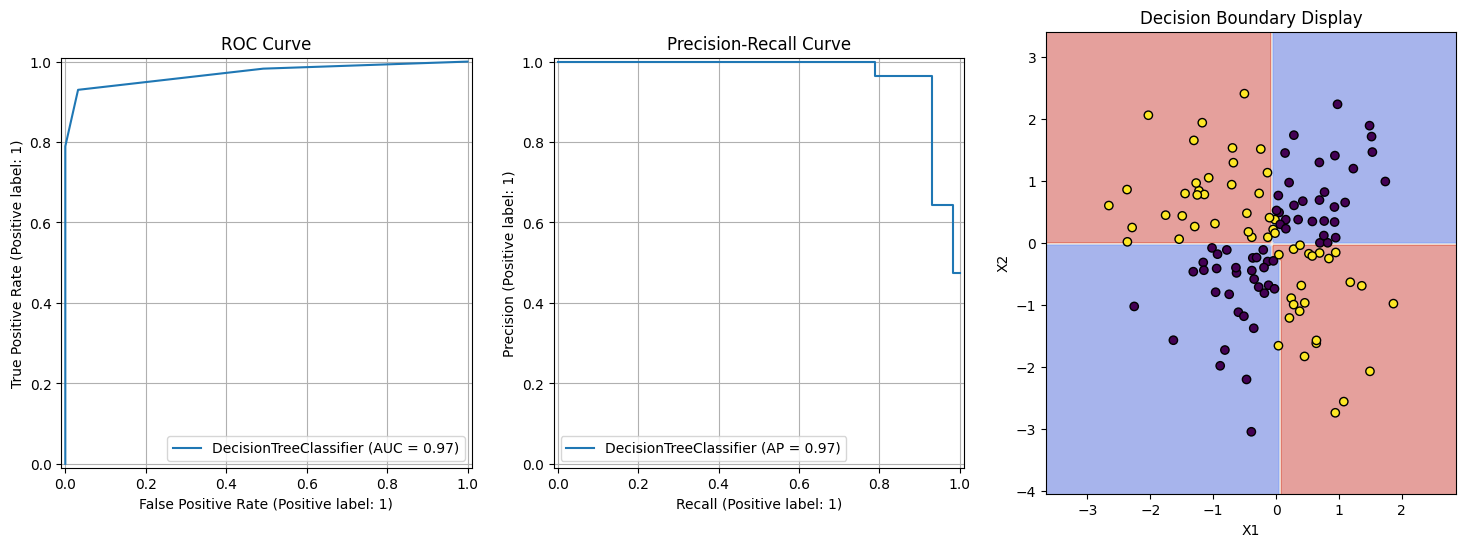

In [27]:
y_test_xor_pred = grid_search_2.best_estimator_.predict(xor_test[["X1", "X2"]])


precision, recall, f1, _ = precision_recall_fscore_support(
    xor_test["Y"],
    y_test_xor_pred,
    average='binary' 
)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")
print(f"Confusion matrix:\n{confusion_matrix(xor_test["Y"],y_test_xor_pred)}")


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

RocCurveDisplay.from_estimator(
    grid_search_2.best_estimator_,
    xor_test[["X1", "X2"]],
    xor_test["Y"],
    ax=axes[0]
)
axes[0].set_title("ROC Curve")
axes[0].grid(True)

PrecisionRecallDisplay.from_estimator(
    grid_search_2.best_estimator_,
    xor_test[["X1", "X2"]],
    xor_test["Y"],
    ax=axes[1]
)
axes[1].set_title("Precision-Recall Curve")
axes[1].grid(True)


disp = DecisionBoundaryDisplay.from_estimator(
    grid_search_2.best_estimator_,
    xor_test[["X1", "X2"]],
    response_method="predict",
    xlabel="X1",
    ylabel="X2",
    alpha=0.5,
    cmap="coolwarm",
    ax=axes[2]
)
axes[2].set_title("Decision Boundary Display")
disp.ax_.scatter(xor_test["X1"], xor_test["X2"], c=xor_test["Y"], edgecolor="k")

### Візуалізація `grid_search_2.best_estimator_`

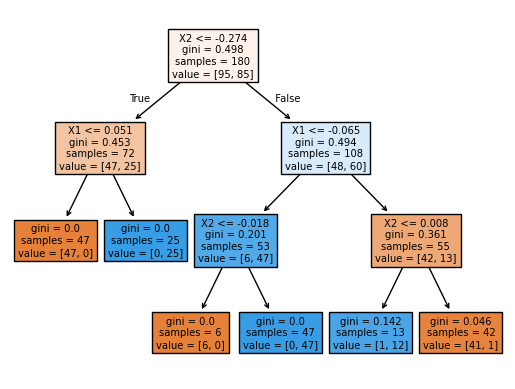

In [28]:
_ = plot_tree(
    grid_search_2.best_estimator_, 
    feature_names=["X1","X2"], 
    filled=True,
)

## Висновки

Було досліджено модель класифікації дерева рішення на незбалансованому наборі про вебсайти та збалансованому, але типу XOR. Для оцінки якості моделі натренованої на першому наборі в метриках вказаний параметр `average='macro'`. Для пошуку найкращих гіперпараметрів моделі залучено решітчастий пошук.

Проблема XOR відображена на відповідному графіки границь рішень. Проте решта метрик кажуть про гарну класифікацію.

Проблема незбалансованості наборів даних майже подолана шляхом добування нових фіч, які корелюють з цільовою змінною.